# Web Scraping an XML Web-Page 

[pythonprogramming.net](https://pythonprogramming.net/) is a website that offers Python tutorials for various topics. 

We're going to go through the following workflow to analyze some summary information of their tutorials:

1. We will scrape their [sitemap's xml file](https://pythonprogramming.net/sitemap.xml) file using [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/), retrieving all the URLs for their various tutorials.
2. We will then clean the URLs to only keep the keywords of interest.
3. With the cleaned URLs, we'll construct a word cloud to visualize the frequency of appearance of each word. 

## Introduction

As always, we'll begin by importing the libraries we'll need:

In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests

We'll read in the URL as the variable `source`, and then turn it into a BeautifulSoup object using an xml parses.

In [2]:
source = requests.get("https://pythonprogramming.net/sitemap.xml").text
soup = BeautifulSoup(source, "xml")

print(soup.prettify())
# Printing not done in notebook to limit size of file.

We see that every URL is nested in `<loc>` tags. Retrieving the URLs should therefore be a simple matter of applying the `find_all('loc')` function.

## Retrieving the URLs:

In [8]:
url_list = [] # initialize empty list that will hold URLs

for url in soup.find_all('loc'):
    url_name = url.text
    url_list.append(url_name)
    
print(url_list)
print(len(url_list))

# Print not executed in notebook to limit file size.
# Only length is printed.

938


## Cleaning URLs

We see above that we retrieved the URLs successfully. The next steps will be to clean the URLs, and sift out the URLs that we won't need. 

In [9]:
cleaned_list1 = []
for each in url_list:
    each = each.replace("https://pythonprogramming.net/", "") # Removing start of url
    cleaned_list1.append(each)
    
print(cleaned_list1)

# Printing not done in notebook to limit size of file.

We see that some URLs start with category names, like 'downloads/', 'go/', 'about/'. We will get rid of these. We will also get rid of the forward slash at the end of URLs ("/")

In [10]:
# Using list comprehension to pick URL names that don't start with categories.

cleaned_list2 = [url for url in cleaned_list1 if not (url.startswith("downloads/") or url.startswith("store/") or url.startswith("community/") or url.startswith("about/") or url.startswith("go/") or url.startswith("user/"))]


# Removing forward slash

cleaned_list3 = []
for each in cleaned_list2:
    each = each.replace("/","")
    cleaned_list3.append(each)
    
cleaned_list3
# Printing not done in notebook to limit size of file.

We'll split the URL names by the hyphen, to obtain a list of individual names:

In [11]:
final_list = []

for each in cleaned_list3:
    words = each.split('-') # now the words variable is a list, each component of this list will be appended to final_list
    for word in words:
        final_list.append(word)
    
final_list
# Printing not done in notebook to limit size of file.

## Constructing the Word Cloud

We will use the [`str.join()` function](https://www.geeksforgeeks.org/join-function-python/) to store elements of `final_list` as a single string, separated by a space.

We'll then use the `wordcloud` library to generate the final wordcloud we want.

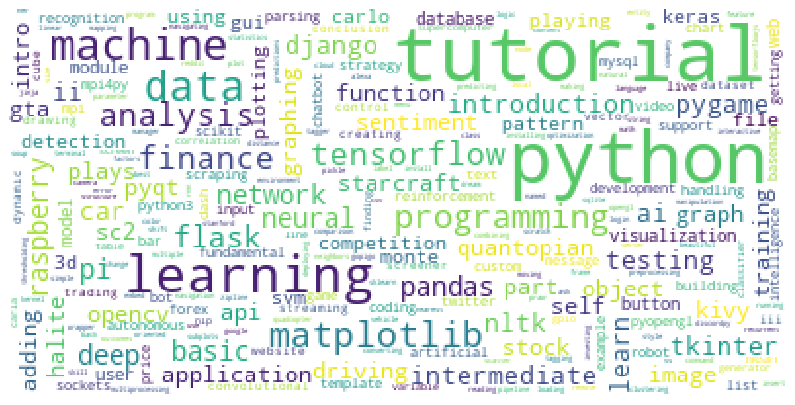

In [7]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

stopwords = set(STOPWORDS)


mpl.rcParams['figure.figsize']=(14,12)   
mpl.rcParams['font.size']=14              
mpl.rcParams['savefig.dpi']=100           
mpl.rcParams['figure.subplot.bottom']=.1

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords, # prevents words like "the", "a" appearing.
                          max_words=250,
                          collocations = False, # collocations = False prevents phrases from being picked up
                          max_font_size=40, 
                          random_state=42
                         ).generate(" ".join(final_list))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# fig.savefig("word1.png", dpi=900) # to save figure